# TMDb Dataset Analysis

>  TMDb (The Movie Database) is a database which contain information about movies' cast, directors, user ratings, budget, revenus, etc.. The dataset size makes it easy to handle, without the need for much cleaning other than removing null values and duplicated rows.

> It provides several dependent vairables as revenue and rating which are self-explanatory. Another dependent variable is popularity which is a varibale which is specific to the TMDb website (calculated based on movie page views and other related information).

> Several independent variables such as cast, director, runtime, budget, etc. enable alot of question to be asked, and my questions were:
> 1. What are the most frequent genres in the dataset?
> 2. Who are the most frequent actors in the dataset?
> 3. Who are the most frequent directors in the dataset?
> 4. Who are the known actors and directors with the highest movie ratings?
> 5. What is the average runtime of the top 20 directors?
> 6. Is there a relationship between their runtime and rating?
> 7. Is there a difference in the voting average along the years?
> 8. Is there a difference in the revenue along the years?
> 9. Is there a difference in the budget along the years?
> 10. What is the number of movies produced each year?
> 11. Does the meer increase in budgets mean that these movie were going to be praised?
> 12. Does the same hold with revenue?



In [75]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from collections import Counter
from itertools import chain, combinations

%matplotlib inline

In [76]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [77]:
# check dtypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [78]:
# drop innecessary columns
unnecessary_cols = ["imdb_id", "budget", "revenue", "homepage", "tagline", "keywords", "overview"]
df2 = df.copy()
df2 = df2.drop(unnecessary_cols, axis=1)
df2.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> The reasons for removing the previously mentioned columns are:
> 1. We already have a row indentifier which is id, so it's unnecessary to have another one such as imdb_id.
> 2. budget and revenue columns aren't as good as budget_adj and revenue_adj which are adjusted for inflation, so would enable better comaprisons between movies that were released in different times.
> 3. There is no use for homepage column in the analysis that we are aiming for. Also, the tagline, overview and keywords column could be used in separate analysis and visualizations using nlp methods.

In [79]:
# rename some columns
df2.rename(columns={
    "production_companies": "companies", "budget_adj": "budget", "revenue_adj": "revenue"
    }, inplace=True)

In [80]:
# clean dtypes and na values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
companies         9836 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget            10866 non-null float64
revenue           10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


In [81]:
df2.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget,revenue
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


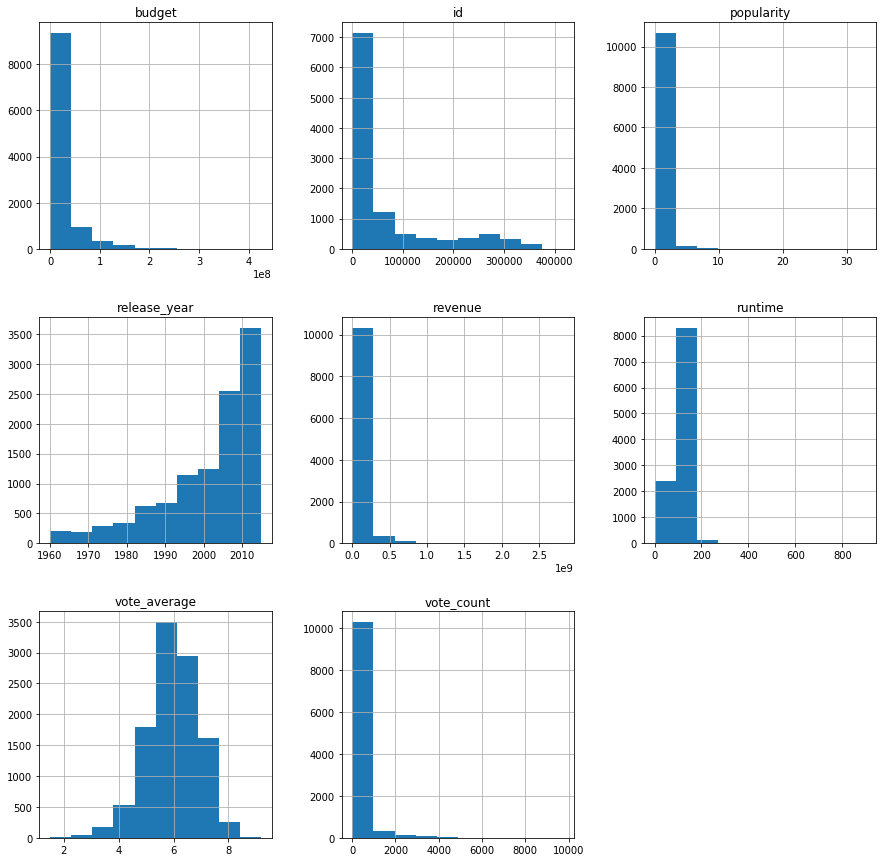

In [82]:
df2.hist(figsize=(15, 15));

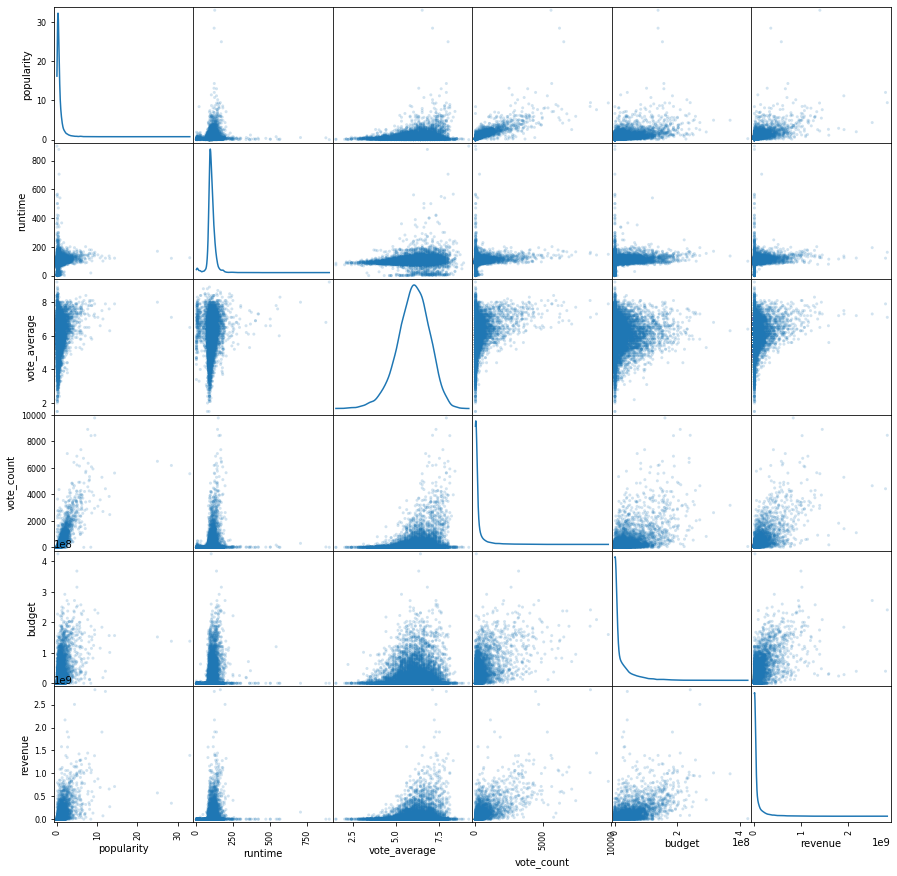

In [83]:
cols = ['popularity', 'runtime', 'vote_average', 'vote_count', 'budget', 'revenue']
pd.plotting.scatter_matrix(df2[cols], figsize=(15, 15), alpha=0.2, diagonal="kde");

In [84]:
print("Number of zero values in run_time:", (df2.runtime == 0).sum())
print("Number of zero values in budget_adj:", (df2.budget == 0).sum())
print("Number of zero values in revenue_adj:", (df2.revenue == 0).sum())

Number of zero values in run_time: 31
Number of zero values in budget_adj: 5696
Number of zero values in revenue_adj: 6016


> Null values in budget, revenue and runtime are imputed with zeros. Therefore, to do any analysis on such columns, the zeros must be dropped. However, removing either one of budget or revenue zero rows would result in losing half of the dataset, diminshing the credibility of any results we might be able to get. So I will create a separate dataframe that contians clean revenue and budget to use it whenever necessary.

> Removing the runtime na rows wouldn't help us gain much, moreover some of them will certainly be removed when drop the na values in categroical columns. The rest will be imputed with the mean runtime.

> Also vote_count feature will be dropped as it is only representative of the count on TMDb website, which isn't globally representative as revenue or rating. Moreover, popularity is extremely related to it.

In [85]:
print("Total number of na values in each categorical column:\n%s" % 
      df2[df2.columns.difference(df2.describe().columns)].isna().sum(), "\n")
print("Total number of rows to drop for having na values in categroical columns:",
      (df2[df2.columns.difference(df2.describe().columns)].isna() > 0).sum(axis=1).sum())

df2 = df2.dropna(axis=0, how='any')

print("\nDataset shape after dropping na values:", df2.shape)

Total number of na values in each categorical column:
cast                76
companies         1030
director            44
genres              23
original_title       0
release_date         0
dtype: int64 

Total number of rows to drop for having na values in categroical columns: 1173

Dataset shape after dropping na values: (9773, 14)


In [86]:
# imputing runtime with mean 

df2.runtime.fillna(value=df2.runtime.mean, inplace=True)

In [87]:
print("The number of duplicate rows:", df2.duplicated().sum())
df2[df2.duplicated()]

The number of duplicate rows: 1


,id,popularity,original_title,cast,director,runtime,genres,companies,release_date,vote_count,vote_average,release_year,budget,revenue
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [88]:
df2.drop_duplicates(inplace=True)
print("The number of duplicate rows:", df2.duplicated().sum())

The number of duplicate rows: 0


In [89]:
# Processing cast, companies and genres columns
list_cols = ["cast", "companies", "genres"]
for col in list_cols:
    df2[col] = df2[col].str.split("|")
    
df2[list_cols].head()

,cast,companies,genres
0,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...","[Universal Studios, Amblin Entertainment, Lege...","[Action, Adventure, Science Fiction, Thriller]"
1,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...","[Village Roadshow Pictures, Kennedy Miller Pro...","[Action, Adventure, Science Fiction, Thriller]"
2,"[Shailene Woodley, Theo James, Kate Winslet, A...","[Summit Entertainment, Mandeville Films, Red W...","[Adventure, Science Fiction, Thriller]"
3,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...","[Lucasfilm, Truenorth Productions, Bad Robot]","[Action, Adventure, Science Fiction, Fantasy]"
4,"[Vin Diesel, Paul Walker, Jason Statham, Miche...","[Universal Pictures, Original Film, Media Righ...","[Action, Crime, Thriller]"


In [90]:
# define a function to calculate list frequencies
def get_list_col_count(list_col):
    items = list(chain.from_iterable(list_col.values.tolist()))
    items_count = pd.Series(Counter(items)).sort_values(ascending=False)
    return items_count

In [91]:
# create dataframe with clean revenue and budget

df3 = df2.copy()
df3 = df3.query("revenue > 0 and budget > 0")

> ## Q1. What are the most frequent genres in the dataset?
> ## Q2. Who are the most frequent actors in the dataset?
> ## Q3. Who are the most frequent directors in the dataset?

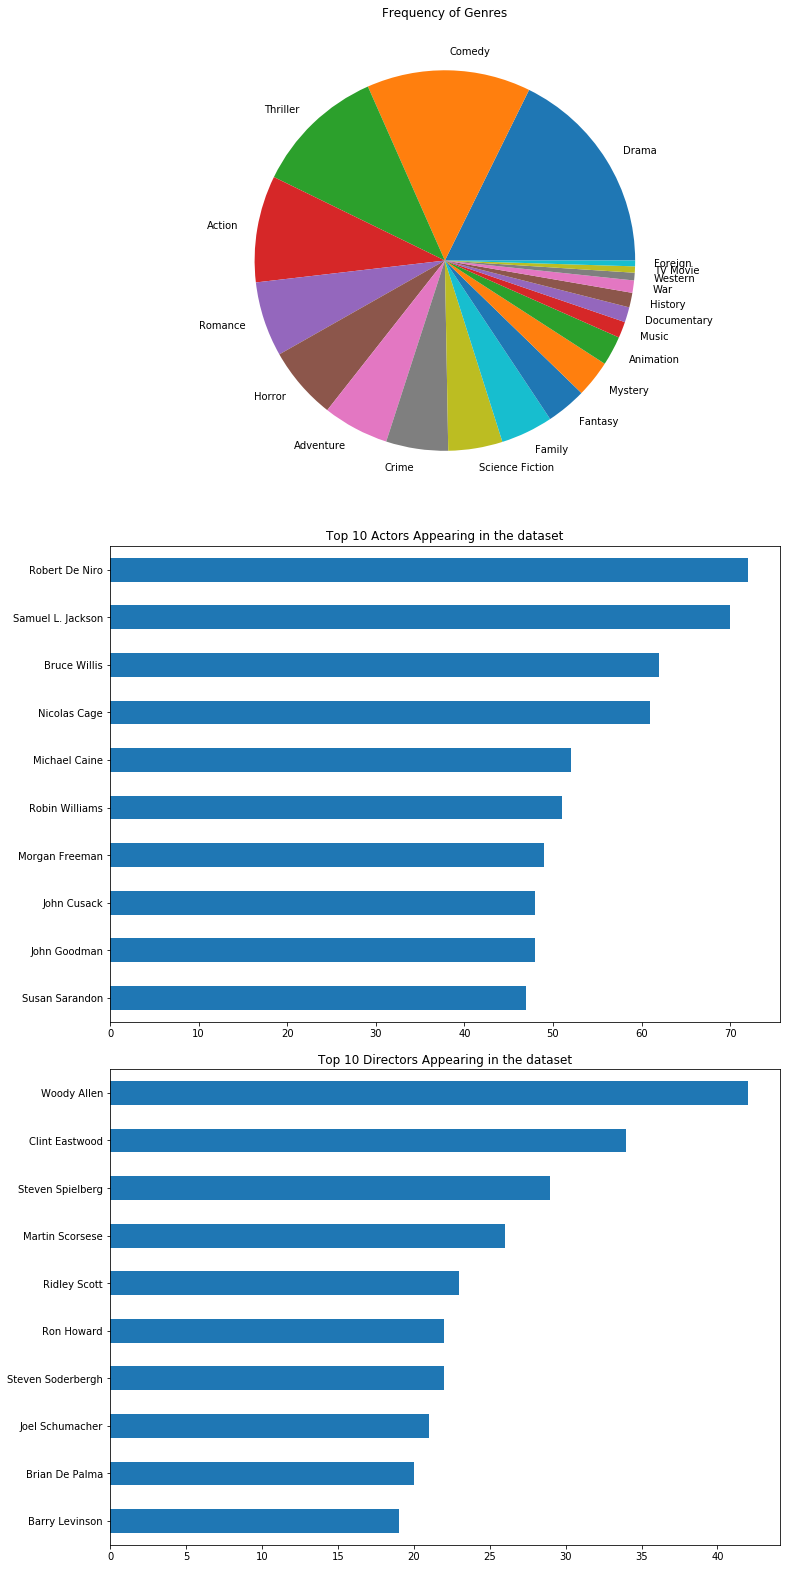

In [92]:
fig, axes = plt.subplots(3, figsize=(12, 28))
plt.subplots_adjust(hspace=0.1)

genres_count = get_list_col_count(df2.genres)
genres_count.plot(kind="pie", ax=axes[0])
axes[0].set_title("Frequency of Genres")
axes[0].set_ylabel("")

actors_count = get_list_col_count(df2.cast)
actors_count[:10][::-1].plot(kind="barh", ax=axes[1])
axes[1].set_title("Top 10 Actors Appearing in the dataset")

directors_count = df2.director.value_counts().sort_values(ascending=False)
directors_count[:10][::-1].plot(kind="barh", ax=axes[2])
axes[2].set_title("Top 10 Directors Appearing in the dataset");

## Q4. Who are the known actors and directors with the highest movies ratings?

In [93]:
# unpack the actors in each cast list in a dataframe with the assigning the rating of the movie to each actor
actors_ratings = pd.DataFrame({
    "actor": list(chain.from_iterable(df2.cast.values.tolist())),
    "rating": df2.vote_average.values.repeat(df2.cast.str.len())
})

In [94]:
# To filter the known actors, we have to select only the actors that starred in alot of movies
actors_counts = actors_ratings.groupby("actor").rating.agg(count=len)
actors_valid = actors_counts.query("count >= 30").index

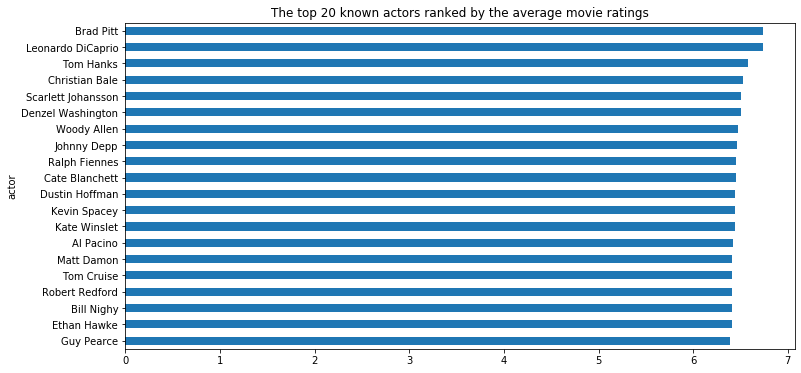

In [95]:
actors_mask = actors_ratings.actor.apply(lambda x: x in actors_valid)
ax = actors_ratings[actors_mask].groupby("actor").rating.mean().sort_values(ascending=False)[:20][::-1].plot(
    kind="barh", figsize=(12, 6));

ax.set_title("The top 20 known actors ranked by the average movie ratings");

In [96]:
# We filter out the directors who directed less than 5 movies 
directors_counts = df2.groupby("director").vote_average.agg(count=len)
directors_valid = directors_counts.query("count >= 5").index

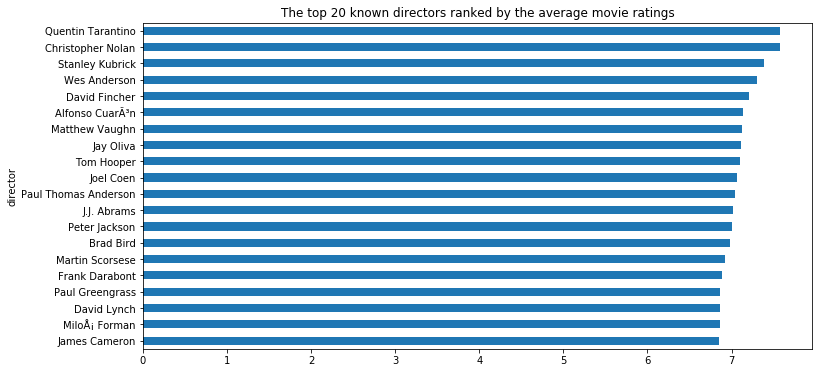

In [97]:
directors_mask = df2.director.apply(lambda x: x in directors_valid)
top_directors_ratings = df2[directors_mask].groupby("director").vote_average.mean().sort_values(
    ascending=False)
top_directors = top_directors_ratings.index
ax = top_directors_ratings[:20][::-1].plot(kind="barh", figsize=(12, 6));
ax.set_title("The top 20 known directors ranked by the average movie ratings");

## Q5. What is the average runtime of the top 20 directors?

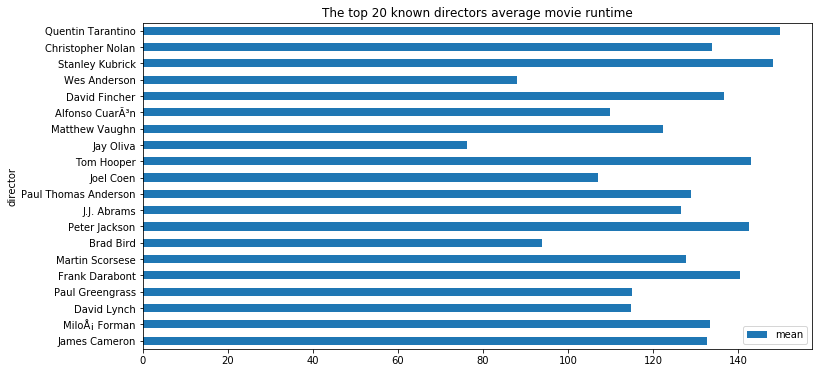

In [98]:
top_20_directors_mask = df2.director.apply(lambda x: x in top_directors[:20])
top_20_directors_runtime = df2[top_20_directors_mask].groupby("director").runtime.agg(mean=np.mean)
top_20_directors_runtime.loc[top_directors[:20][::-1]].plot(kind="barh", figsize=(12, 6))
plt.title("The top 20 known directors average movie runtime");

## Q6. Is there a relationship between their runtime and rating?

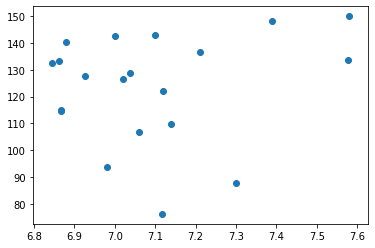

In [99]:
plt.scatter(top_20_directors_ratings,
            top_20_directors_runtime.loc[top_20_directors_ratings.index]);

> There doesn't seem to be a relationship.

> ## In the following questions, we will be using df3 along with df2 since we want to look into the revenue and budgets relationship with other features.

## Q7. Is there a difference in the voting average along the years?

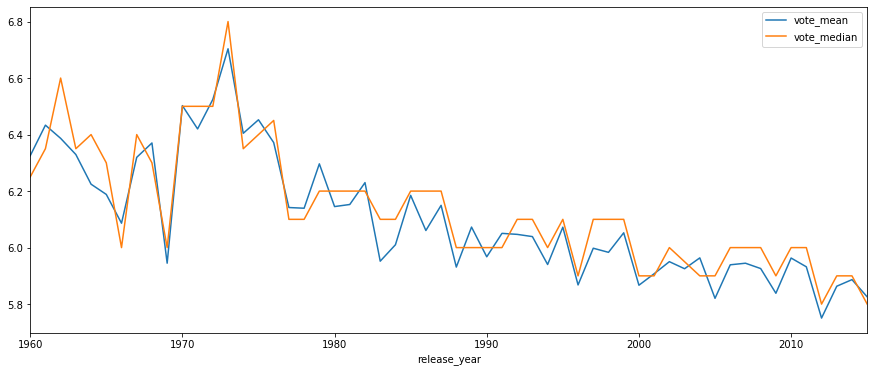

In [100]:
df2.groupby("release_year").vote_average.agg(vote_mean=np.mean,
                                             vote_median=np.median,).plot(figsize=(15, 6));

> There is a trend of decline in the audiences ratings to movies over the years. The spike in 1960s-1970s may be due to the production of multiple movies that changed the realm of cinema. Once that happened, the audience expected more and more of that to happpen, but what actually happened is that more movies were produced that didn't meet their expectations. 

## Q8. Is there a difference in the revenue along the years?

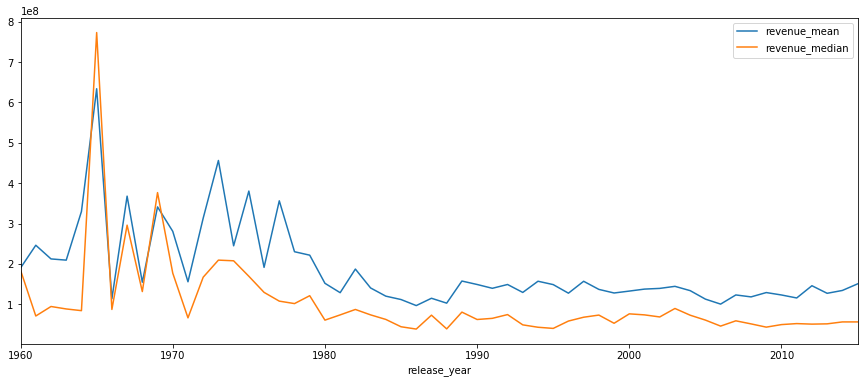

In [101]:
df3.groupby("release_year").revenue.agg(revenue_mean=np.mean,
                                        revenue_median=np.median).plot(figsize=(15, 6));

> We have to remember that we are plotting the revenue adjusted for inflation. Which means that the spike in the revenuue between 1960-1970 is relatively higher in terms of today's money, but of course back the then the literal revenue was much lower. 

> However, this spike doesn't make much sense. Maybe the fraction of null values was greater in these years? Which results in higher mean revenue as their isn't enough data was normal or low revenue to decrease the mean? Let's make a plot with the fraction of null values in revenue for each year. 

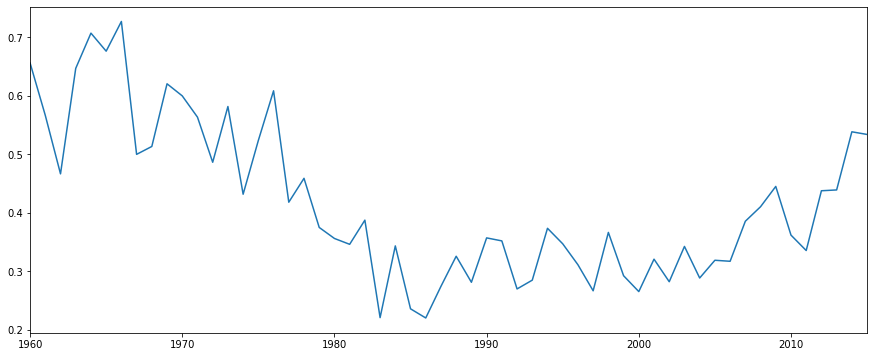

In [102]:
null_number = df2.query("revenue == 0 & budget == 0").release_year.value_counts().sort_index()
total_number = df2.release_year.value_counts().sort_index()
null_fraction = null_number/total_number
null_fraction.plot(figsize=(15, 6));

> It is evident now that the spike in the mean_revenue in years before 1980 was due to the increased fraction of null values. Therefore, the only reliable data for movies that were produced in that period is that of movies that were a huge success.

## Q9. Is there a difference in the budget along the years?

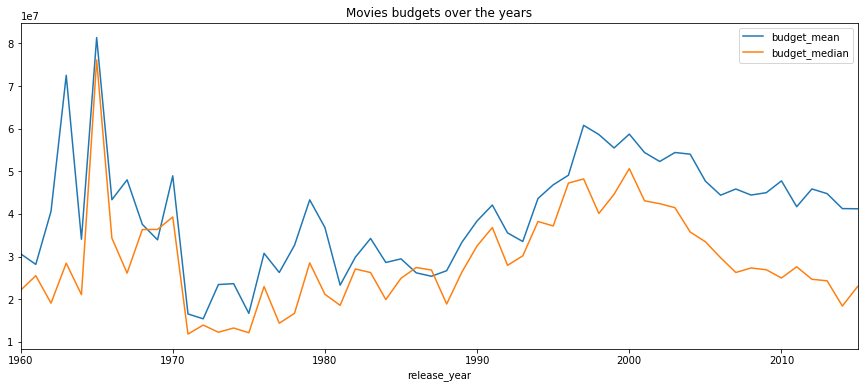

In [103]:
ax = df3.groupby("release_year").budget.agg(budget_mean=np.mean,
                                       budget_median=np.median).plot(figsize=(15, 6));
ax.set_title("Movies budgets over the years");

> By disregrading the credibility of the data before 1980, we can start looking afterwards to see that a trend of increasing budget that inflected at the beginning of 21st century.

> After the year 2000, the budget median began to decline fast, while the mean declined but not as fast as the median. 

> This means that most movies budgets were declining while at the same time some outliers had excessively high budgets that skewed the median more and more to the right, and hence slowing down it's decline. 

> If this is true, then if we made the same plot after removing the outliers we'd find that the mean and median are still parallel to each other.

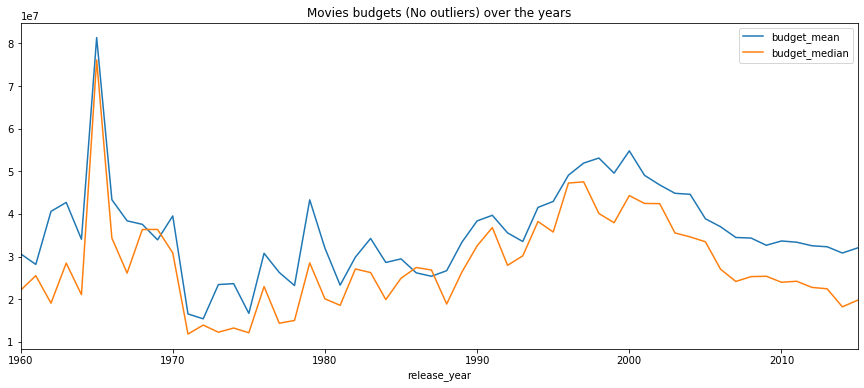

In [104]:
ax = df3.query("budget < budget.quantile(0.95)").groupby("release_year").budget.agg(budget_mean=np.mean,
                                       budget_median=np.median).plot(figsize=(15, 6));
ax.set_title("Movies budgets (No outliers) over the years");

## Q10. What is the number of movies produced each year?

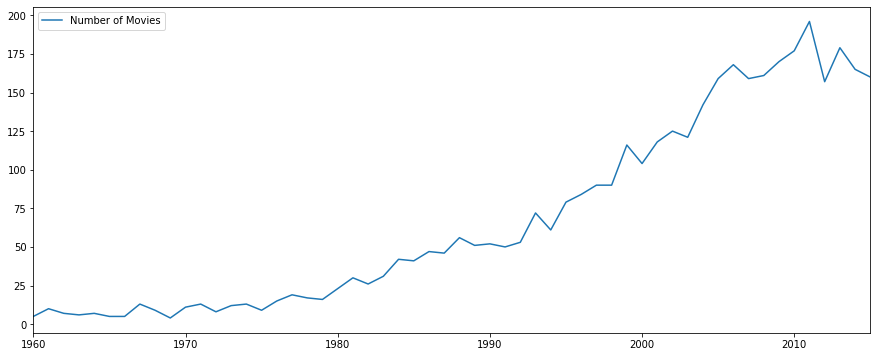

In [105]:
df3.release_year.value_counts().sort_index().plot(figsize=(15, 6), label="Number of Movies");
plt.legend();

## Q11.  Does the meer increase in budgets mean that these movie were going to be praised?

> As we see in the following scatter plot between vote_average and budget, the funnel shape indicates that the spread of the distribution of a budgets over vote_averages had some decrease when the budget increased.

> What happens is that when the budget increases, the number of samples decrease (as fewer movies are made greater budgets), and the spread of their distribution decreases.

> We can test this by removing the budget outliers, then binning the budget and then plotting it's mean, median and variance over all the bins to see if they have any difference at all.

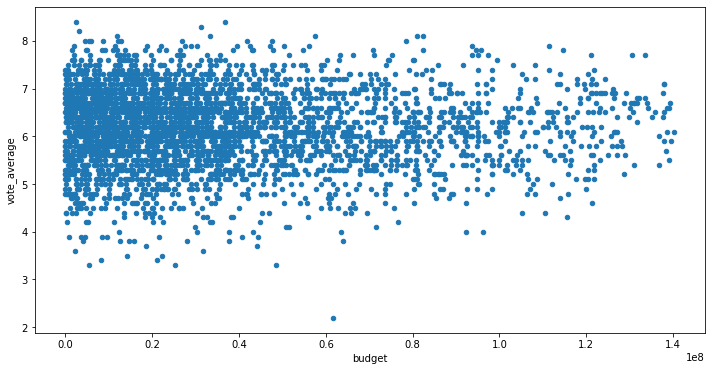

In [106]:
df3.query("budget < budget.quantile(0.95)").plot(x="budget", y="vote_average", kind="scatter", figsize=(12,6));

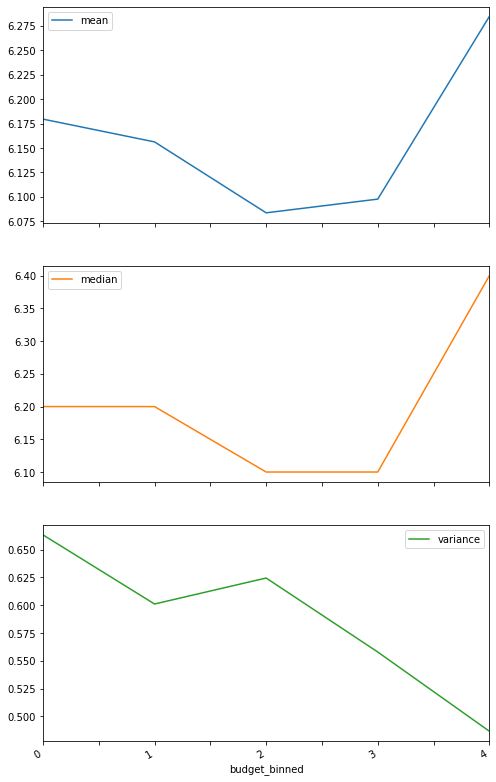

In [107]:
budget_vote = df3[["budget", "vote_average"]].copy()
budget_vote = budget_vote.query("budget < budget.quantile(0.95)")
budget_vote["budget_binned"] = pd.cut(budget_vote.budget, 5, labels=list(range(5)))
budget_vote.groupby("budget_binned").vote_average.agg(mean=np.mean,
                                                      median=np.median,
                                                      variance = np.var).plot(figsize=(8, 15), subplots=True);

> We can see an inflection point after the second bin in the 3 plots, which means that:
> 1. The center of the distribution of votes shifted to the right as the budget increased. (higher vote_mean and median)
> 2. The spread of the distribution of votes got smaller as the budget increased. (Increasing the probability of being close to the center)

> In layman's terms we can say that movies with higher budgets tend to have better viewer ratings.

## Q12. Does the same hold with revenue?

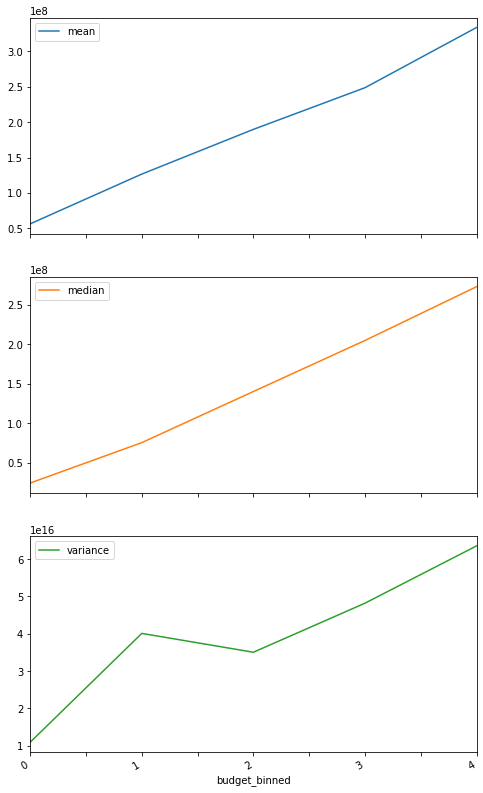

In [108]:
budget_revenue = df3[["budget", "revenue"]].copy()
budget_revenue = budget_revenue.query("budget < budget.quantile(0.95)")
budget_revenue["budget_binned"] = pd.cut(budget_revenue.budget, 5, labels=list(range(5)))
budget_revenue.groupby("budget_binned").revenue.agg(mean=np.mean,
                                                      median=np.median,
                                                      variance = np.var,).plot(figsize=(8, 15), subplots=True);

> The steady increase in the mean and median mean that the center of the distribution of revenue increases as the budget increase, but the increase in variance denote the unstability of predicting a movie's revenue solely based on the budget, as the spread of the distribution also increases.

> In layman's terms, movies with high budgets tend to have higher revenue, however it doesn't grant that the movie will be a blockbuster.

## Conclusion
 
> The dataset didn't prove much useful in exploring the relationship between other variables and revenue, due to the presence of many null values. The rest of the dataset exploration provided relevant trivial information about the industry.
